In [1]:
# Install necessary packages
install.packages("tidyverse")
library(tidyverse)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Step 1: Loading the Datasets

In [2]:
# Load the CodeCarbon dataset
code_carbon_data <- read.csv("/content/energy_usage.csv")
# Load the power meter dataset
power_monitor_data <- read.csv("/content/scripts_pm_logs_1000th.csv")

# Display the first few rows of each dataset to understand their structure
head(code_carbon_data)
head(power_monitor_data)


,CPU.Energy,CPU.Model,Device.ID,Duration..s.,Energy..kWh.,GPU.Energy,GPU.Model,Log.Level,Measure.Power.Secs,Measurement.Type,OS,RAM,RAM.Energy,Run.ID,Run.Number,Script,Total.Energy.Consumed,Tracking.Mode
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<lgl>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>,<dbl>,<chr>
1,3.877856e-05,ARMv8 Processor rev 1 (v8l),Jetson Nano,3.285547,4.010215e-05,0,NA,debug,5,CC,Linux-4.9.337-tegra-aarch64-with-Ubuntu-18.04-bionic,3.870979,1.323588e-06,824b99bb3ff366a65ecbbc673f30192ed4fbac8b5c14fc7175b2024b7145a833,1,ada_boost_iris.py,4.010215e-05,machine
2,3.238749e-05,ARMv8 Processor rev 1 (v8l),Jetson Nano,2.744173,3.349283e-05,0,NA,debug,5,CC,Linux-4.9.337-tegra-aarch64-with-Ubuntu-18.04-bionic,3.870979,1.105339e-06,9faa48419be31211fe106087c2ab0de17dccd62952b44339142c18298bea792c,1,decision_tree_wine.py,3.349283e-05,machine
3,3.370906e-05,ARMv8 Processor rev 1 (v8l),Jetson Nano,2.856141,3.485952e-05,0,NA,debug,5,CC,Linux-4.9.337-tegra-aarch64-with-Ubuntu-18.04-bionic,3.870979,1.150457e-06,60f940a8f340396f7e29fabd70f3d6ce64c7c39cbc8fb0526fa71e6d3e5b7837,1,k_means_clustering_iris.py,3.485952e-05,machine
4,3.206449e-05,ARMv8 Processor rev 1 (v8l),Jetson Nano,2.716815,3.315882e-05,0,NA,debug,5,CC,Linux-4.9.337-tegra-aarch64-with-Ubuntu-18.04-bionic,3.870979,1.094323e-06,805b314be16865b9ba35483fceef3e09e688d37e7cff8fd229e9b20952e1a568,1,linear_regression_diabetes.py,3.315882e-05,machine
5,5.536904e-05,ARMv8 Processor rev 1 (v8l),Jetson Nano,4.690858,5.725934e-05,0,NA,debug,5,CC,Linux-4.9.337-tegra-aarch64-with-Ubuntu-18.04-bionic,3.870979,1.890302e-06,a19adaa6b0a52e01c228b660c3cdf8bd4b7bece0cb00f693d5a0b1b6d04aee80,1,logistic_regression_breast_cancer.py,5.725934e-05,machine
6,3.546020e-05,ARMv8 Processor rev 1 (v8l),Jetson Nano,3.004453,3.667039e-05,0,NA,debug,5,CC,Linux-4.9.337-tegra-aarch64-with-Ubuntu-18.04-bionic,3.870979,1.210190e-06,34da61d5998774ed9ed2a5dc0bff8dad69c2c5a8a6d4b28618048608e8d351f9,1,naive_bayes_digits.py,3.667039e-05,machine


,Time..s.,Main.Avg.Current..mA.,Main.Avg.Power..mW.,Main.Avg.Voltage..V.
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00,410.491,2049.171,4.992
2,0.02,410.979,2051.607,4.992
3,0.04,410.491,2049.171,4.992
4,0.06,410.369,2048.562,4.992
5,0.08,410.247,2048.773,4.994
6,0.10,411.833,2055.870,4.992


In [3]:
# Load necessary library
library(dplyr)

# Sample data frame creation
# Assuming the dataframe 'code_carbon_data' already exists and has been loaded
# If not, you would typically load it from a file like so:
# code_carbon_data <- read.csv("path_to_your_data.csv")

# Calculate basic statistics for the 'Energy..kWh.' column
basic_stats <- code_carbon_data %>%
  summarise(
    Mean = mean(Energy..kWh., na.rm = TRUE),
    Median = median(Energy..kWh., na.rm = TRUE),
    Standard_Deviation = sd(Energy..kWh., na.rm = TRUE),
    Variance = var(Energy..kWh., na.rm = TRUE),
    Minimum = min(Energy..kWh., na.rm = TRUE),
    Maximum = max(Energy..kWh., na.rm = TRUE)
  )

# Print the results
print(basic_stats)

# Additional useful statistics could include range, quartiles, and the interquartile range
# Here's how you could get those if needed
additional_stats <- code_carbon_data %>%
  summarise(
    First_Quartile = quantile(Energy..kWh., 0.25, na.rm = TRUE),
    Third_Quartile = quantile(Energy..kWh., 0.75, na.rm = TRUE),
    Interquartile_Range = IQR(Energy..kWh., na.rm = TRUE)
  )

# Print additional stats
print(additional_stats)


          Mean       Median Standard_Deviation     Variance     Minimum
1 3.936314e-05 3.539386e-05       8.350375e-06 6.972876e-11 3.19254e-05
       Maximum
1 6.134543e-05
  First_Quartile Third_Quartile Interquartile_Range
1   3.317712e-05   4.139446e-05        8.217334e-06


In [ ]:
colnames(power_monitor_data)

[1] "Time..s."              "Main.Avg.Current..mA." "Main.Avg.Power..mW."  
[4] "Main.Avg.Voltage..V."

**step 2 : Data Cleaning**

In [4]:
# Load necessary libraries
library(tidyverse)

# Assuming the datasets `code_carbon_data` and `power_monitor_data` are already loaded

# Step 1: Checking for Missing Values
print("Missing values in Code Carbon data:")
print(colSums(is.na(code_carbon_data)))

# Step 2: Handle Missing GPU Version
# Replace missing values in the 'GPU Model' column with "Missing NA"
if ("GPU Model" %in% colnames(code_carbon_data)) {
  code_carbon_data$GPU.Model[is.na(code_carbon_data$GPU.Model)] <- "Missing NA"
}

# Step 3: Standardizing Timestamp Formats (if applicable)
# Code Carbon Data: Convert 'Time' to POSIXct (assuming there's a 'Time' column)
if ("Time" %in% colnames(code_carbon_data)) {
  code_carbon_data$Time <- as.POSIXct(code_carbon_data$Time, format = "%Y-%m-%d %H:%M:%S")
}

# Power Monitor Data: Convert 'Time.s.' to numeric safely
print("Structure of 'Time.s.' before conversion:")
str(power_monitor_data$Time.s.)

# Safely convert 'Time.s.' to numeric if it's not already numeric
if (is.character(power_monitor_data$Time.s.) || is.factor(power_monitor_data$Time.s.)) {
  power_monitor_data$Time.s. <- as.numeric(as.character(power_monitor_data$Time.s.))
}

# Step 4: Reviewing Cleaned Data
print("Code Carbon Data Summary After Handling Missing Values:")
print(summary(code_carbon_data))

print("Power Monitor Data Summary:")
print(summary(power_monitor_data))

# Display a few rows from each dataset to confirm changes
print("First few rows of cleaned Code Carbon data:")
print(head(code_carbon_data))

print("First few rows of cleaned Power Monitor data:")
print(head(power_monitor_data))


[1] "Missing values in Code Carbon data:"
           CPU.Energy             CPU.Model             Device.ID 
                    0                     0                     0 
         Duration..s.          Energy..kWh.            GPU.Energy 
                    0                     0                     0 
            GPU.Model             Log.Level    Measure.Power.Secs 
                  900                     0                     0 
     Measurement.Type                    OS                   RAM 
                    0                     0                     0 
           RAM.Energy                Run.ID            Run.Number 
                    0                     0                     0 
               Script Total.Energy.Consumed         Tracking.Mode 
                    0                     0                     0 
[1] "Structure of 'Time.s.' before conversion:"
 NULL
[1] "Code Carbon Data Summary After Handling Missing Values:"
   CPU.Energy         CPU.Model       

In [5]:
# Load necessary libraries
library(tidyverse)

# Step 1: Extract Information from `pm_run_log.txt`
# Read the script run log
run_log <- readLines("/content/pm_run_log.txt")

# Extract script names and run information using regex
script_runs <- tibble(script_name = character(), run_number = integer(), total_runs = integer())

for (line in run_log) {
  match <- str_match(line, "Running script: (.*), Run (\\d+) of (\\d+)")
  if (!is.na(match[1])) {
    script_runs <- script_runs %>%
      add_row(script_name = match[2], run_number = as.integer(match[3]), total_runs = as.integer(match[4]))
  }
}

# Step 2: Load Power Monitor Data
power_monitor_data <- read.csv("/content/scripts_pm_logs_1000th.csv")

# Set parameters for script detection
current_threshold <- 450  # Threshold to detect a script running (in mA)
min_duration <- 0.5  # Minimum duration to be considered a valid run (in seconds)
baseline_power_mW <- 2000  # Set the baseline power usage (in mW)

# Detect script runs in the power monitor data
script_runs_detected <- list()
current_run <- NULL
script_counter <- 1  # Keeps track of which script in the run log we are associating

for (i in 1:(nrow(power_monitor_data) - 1)) {
  current <- power_monitor_data$Main.Avg.Current..mA.[i]
  time_s <- power_monitor_data$Time..s.[i]

  if (current > current_threshold && is.null(current_run)) {
    # Start of a new script run
    current_run <- list(
      start_time = time_s,
      start_index = i,
      script_name = if (script_counter <= nrow(script_runs)) {
        script_runs$script_name[script_counter]
      } else {
        "Unknown"
      }
    )
  } else if (current <= current_threshold && !is.null(current_run)) {
    # End of the current script run
    current_run$end_time <- time_s
    duration <- current_run$end_time - current_run$start_time

    # Only include runs that meet the minimum duration
    if (duration >= min_duration) {
      current_run$duration <- duration
      script_runs_detected <- append(script_runs_detected, list(current_run))
      script_counter <- script_counter + 1  # Move to the next script in the run log
    }
    current_run <- NULL
  }
}

# Convert detected runs to a dataframe
script_runs_detected_df <- do.call(rbind, lapply(script_runs_detected, as.data.frame))

# Step 3: Calculate Energy Consumption for Each Detected Script Run (accounting for baseline power usage)
script_runs_detected_df$Energy_kWh <- NA

for (j in 1:nrow(script_runs_detected_df)) {
  run <- script_runs_detected_df[j, ]
  start_idx <- run$start_index
  end_idx <- which(power_monitor_data$Time..s. <= run$end_time)[length(which(power_monitor_data$Time..s. <= run$end_time))]

  # Calculate average power during the script's run and subtract baseline
  avg_power <- mean(power_monitor_data$Main.Avg.Power..mW.[start_idx:end_idx], na.rm = TRUE)
  additional_power <- max(avg_power - baseline_power_mW, 0)  # Subtract baseline and ensure it's non-negative

  # Use the total script duration for energy calculation
  total_duration_hours <- run$duration / 3600  # Convert duration from seconds to hours

  # Calculate energy consumed during the script run, only considering additional power
  energy <- (additional_power / 1000) * total_duration_hours  # Convert power to kW and multiply by duration in hours

  # Store the calculated energy
  script_runs_detected_df$Energy_kWh[j] <- energy
}

# Step 4: Calculate Average Energy Consumption and Duration for Each Script
script_summary <- script_runs_detected_df %>%
  group_by(script_name) %>%
  summarise(
    avg_energy_kWh = mean(Energy_kWh, na.rm = TRUE),
    avg_duration_s = mean(duration, na.rm = TRUE),
    total_runs = n()
  )

# Step 5: Review the Final Output
print("Summary of Average Energy Consumption and Duration for Each Script:")
print(script_summary)


[1] "Summary of Average Energy Consumption and Duration for Each Script:"
# A tibble: 10 × 4
   script_name                          avg_energy_kWh avg_duration_s total_runs
   <chr>                                         <dbl>          <dbl>      <int>
 1 ada_boost_iris.py                           0.00159           3.29          3
 2 decision_tree_wine.py                       0.00137           2.79          3
 3 k_means_clustering_iris.py                  0.00141           2.90          3
 4 linear_regression_diabetes.py               0.00136           2.85          3
 5 logistic_regression_breast_cancer.py        0.00306           4.81          3
 6 naive_bayes_digits.py                       0.00149           3.05          3
 7 neural_network_wine.py                      0.00171           3.5           3
 8 pca_breast_cancer.py                        0.00144           2.83          3
 9 random_forest_digits.py                     0.00209           4.35          3
10 support_vecto

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


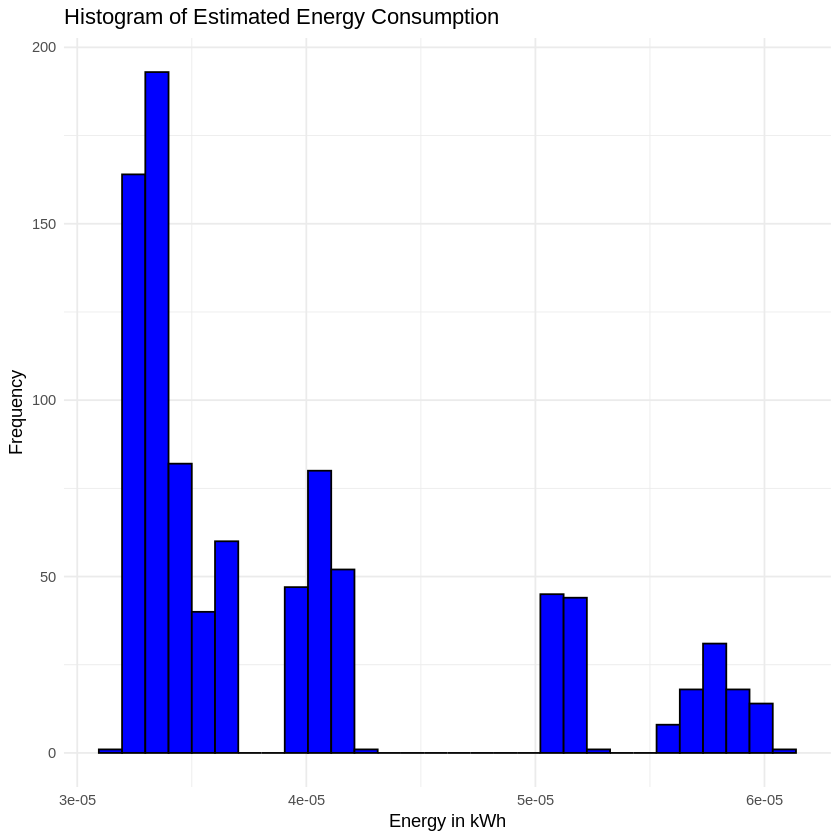

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


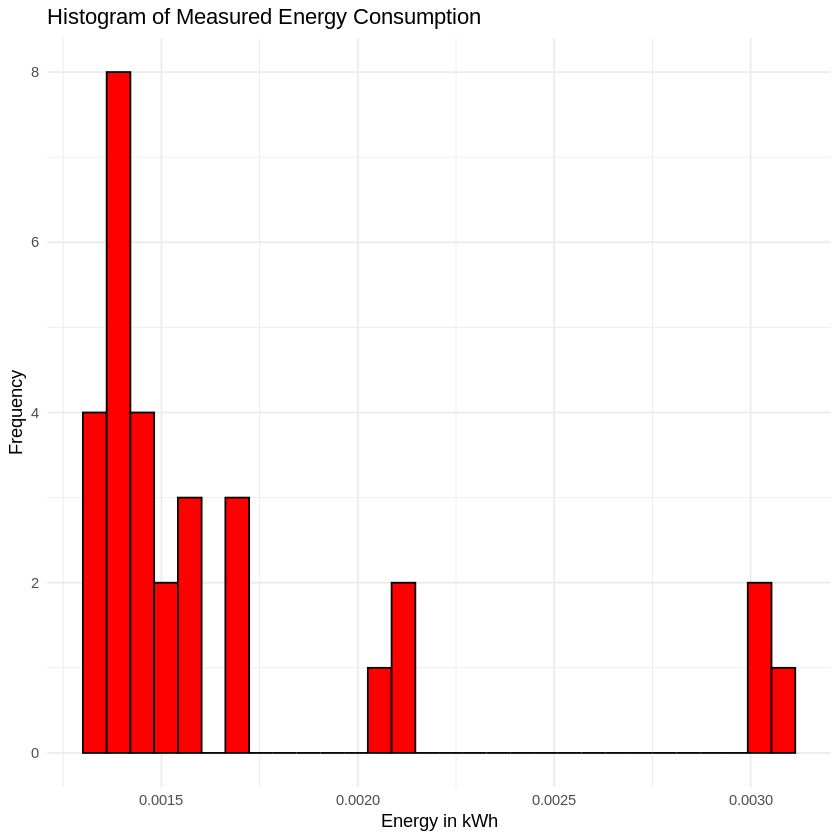

In [6]:
# Load necessary libraries
library(ggplot2)

# Assuming the dataframes are already loaded into the environment
# code_carbon_data and script_runs_detected_df

# Plot for Estimated Energy (Total.Energy.Consumed)
# Automatic bin width
ggplot(code_carbon_data, aes(x = Total.Energy.Consumed)) +
  geom_histogram(fill = "blue", color = "black") +
  labs(title = "Histogram of Estimated Energy Consumption",
       x = "Energy in kWh",
       y = "Frequency") +
  theme_minimal()

# Save the plot to a file
ggsave("estimated_energy_histogram.png", width = 10, height = 6, dpi = 300)

# Plot for Measured Energy (Energy_kWh)
# Automatic bin width
ggplot(script_runs_detected_df, aes(x = Energy_kWh)) +
  geom_histogram(fill = "red", color = "black") +
  labs(title = "Histogram of Measured Energy Consumption",
       x = "Energy in kWh",
       y = "Frequency") +
  theme_minimal()

# Save the plot to a file
ggsave("measured_energy_histogram.png", width = 10, height = 6, dpi = 300)


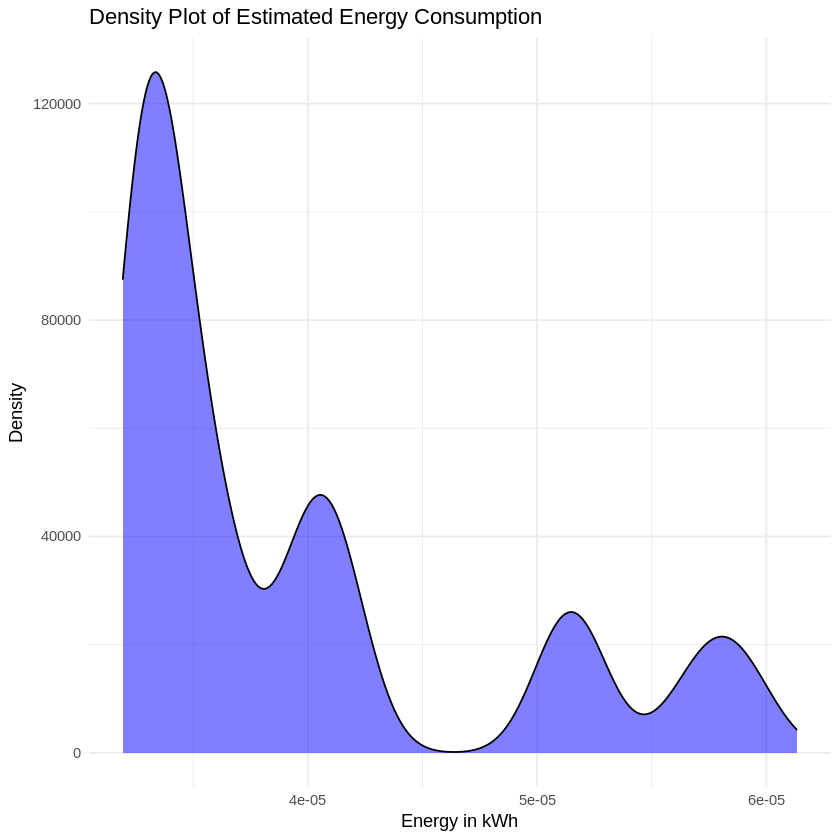

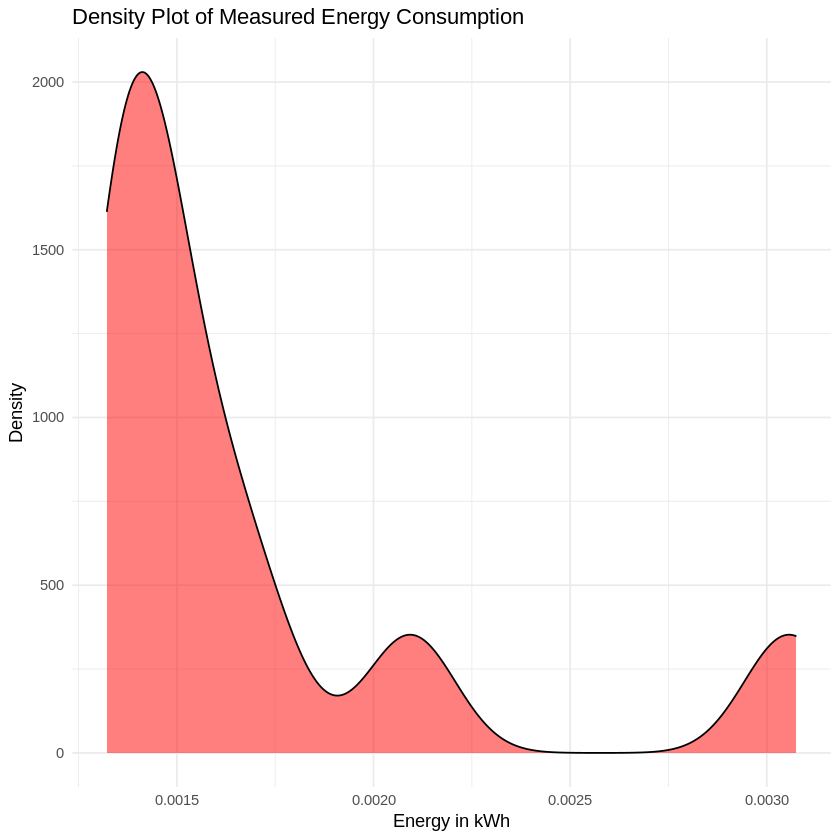

In [ ]:
library(ggplot2)

# Density Plot for Estimated Energy
ggplot(code_carbon_data, aes(x = Total.Energy.Consumed)) +
  geom_density(fill = "blue", alpha = 0.5) +
  labs(title = "Density Plot of Estimated Energy Consumption",
       x = "Energy in kWh",
       y = "Density") +
  theme_minimal()

# Save the plot
ggsave("estimated_energy_density.png", width = 10, height = 6, dpi = 300)

# Density Plot for Measured Energy
ggplot(script_runs_detected_df, aes(x = Energy_kWh)) +
  geom_density(fill = "red", alpha = 0.5) +
  labs(title = "Density Plot of Measured Energy Consumption",
       x = "Energy in kWh",
       y = "Density") +
  theme_minimal()

# Save the plot
ggsave("measured_energy_density.png", width = 10, height = 6, dpi = 300)


In [ ]:
# Shapiro-Wilk test for normality on estimated energy
shapiro.test(code_carbon_data$Total.Energy.Consumed)

# Shapiro-Wilk test for normality on measured energy
shapiro.test(script_runs_detected_df$Energy_kWh)



	Shapiro-Wilk normality test

data:  code_carbon_data$Total.Energy.Consumed
W = 0.77393, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  script_runs_detected_df$Energy_kWh
W = 0.66182, p-value = 4.544e-07


[1] "Summary of Energy Consumption Differences:"
# A tibble: 10 × 5
   script_name  measured_energy_kWh codecarbon_energy_kWh absolute_difference_…¹
   <chr>                      <dbl>                 <dbl>                  <dbl>
 1 ada_boost_i…             0.00159             0.0000398                0.00155
 2 decision_tr…             0.00137             0.0000332                0.00133
 3 k_means_clu…             0.00141             0.0000346                0.00137
 4 linear_regr…             0.00136             0.0000329                0.00133
 5 logistic_re…             0.00306             0.0000580                0.00300
 6 naive_bayes…             0.00149             0.0000363                0.00145
 7 neural_netw…             0.00171             0.0000414                0.00167
 8 pca_breast_…             0.00144             0.0000335                0.00141
 9 random_fore…             0.00209             0.0000515                0.00204
10 support_vec…             0.00134      

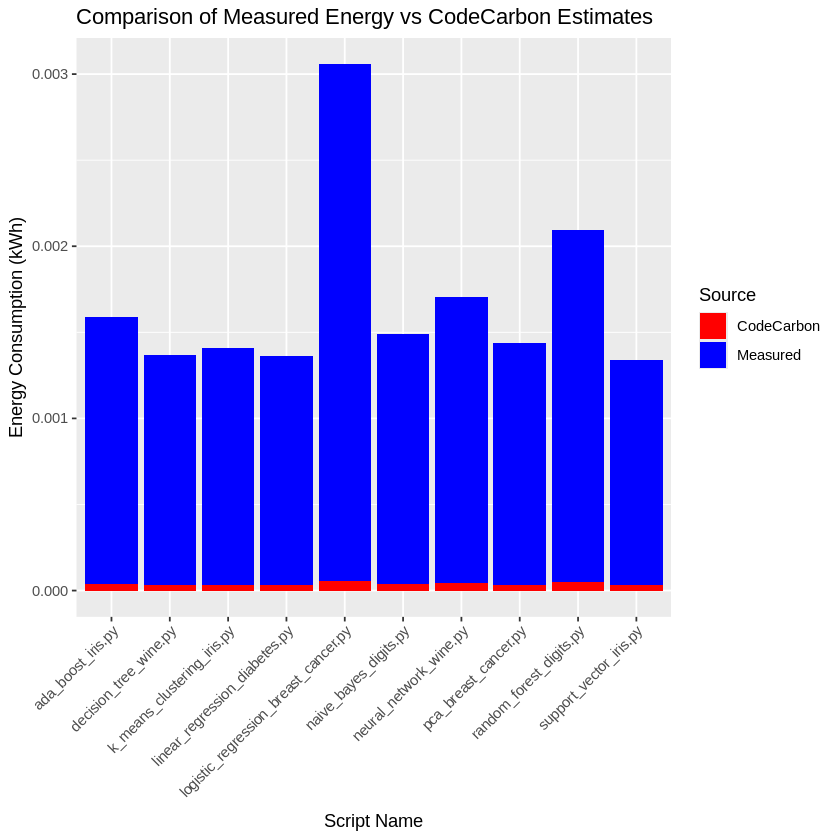

In [7]:
# Step 6: Group and Average the CodeCarbon Data by Script
# Assuming code_carbon_data is already loaded with relevant columns: Script and Energy (kWh)

# Group and summarize CodeCarbon data to get average energy consumption per script
code_carbon_summary <- code_carbon_data %>%
  group_by(Script) %>%
  summarise(
    avg_codecarbon_energy_kWh = mean(Energy..kWh., na.rm = TRUE)
  )

# Step 7: Merge the Measured Data with CodeCarbon Summary
comparison_data <- script_summary %>%
  left_join(code_carbon_summary, by = c("script_name" = "Script")) %>%
  rename(
    measured_energy_kWh = avg_energy_kWh,
    codecarbon_energy_kWh = avg_codecarbon_energy_kWh
  )

# Step 8: Calculate the Differences
comparison_data <- comparison_data %>%
  mutate(
    absolute_difference_kWh = abs(measured_energy_kWh - codecarbon_energy_kWh),
    percentage_error = ifelse(
      measured_energy_kWh == 0,
      NA,
      (absolute_difference_kWh / measured_energy_kWh) * 100
    )
  )

# Step 9: Visualize the Comparison
# Plot showing the measured energy vs CodeCarbon estimates
comparison_plot <- comparison_data %>%
  ggplot(aes(x = script_name)) +
  geom_bar(aes(y = measured_energy_kWh, fill = "Measured"), stat = "identity", position = "dodge") +
  geom_bar(aes(y = codecarbon_energy_kWh, fill = "CodeCarbon"), stat = "identity", position = "dodge") +
  labs(title = "Comparison of Measured Energy vs CodeCarbon Estimates",
       y = "Energy Consumption (kWh)",
       x = "Script Name") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_manual(values = c("Measured" = "blue", "CodeCarbon" = "red"), name = "Source")

print(comparison_plot)

# Step 10: Print Summary Metrics
print("Summary of Energy Consumption Differences:")
print(comparison_data %>% select(script_name, measured_energy_kWh, codecarbon_energy_kWh, absolute_difference_kWh, percentage_error))


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


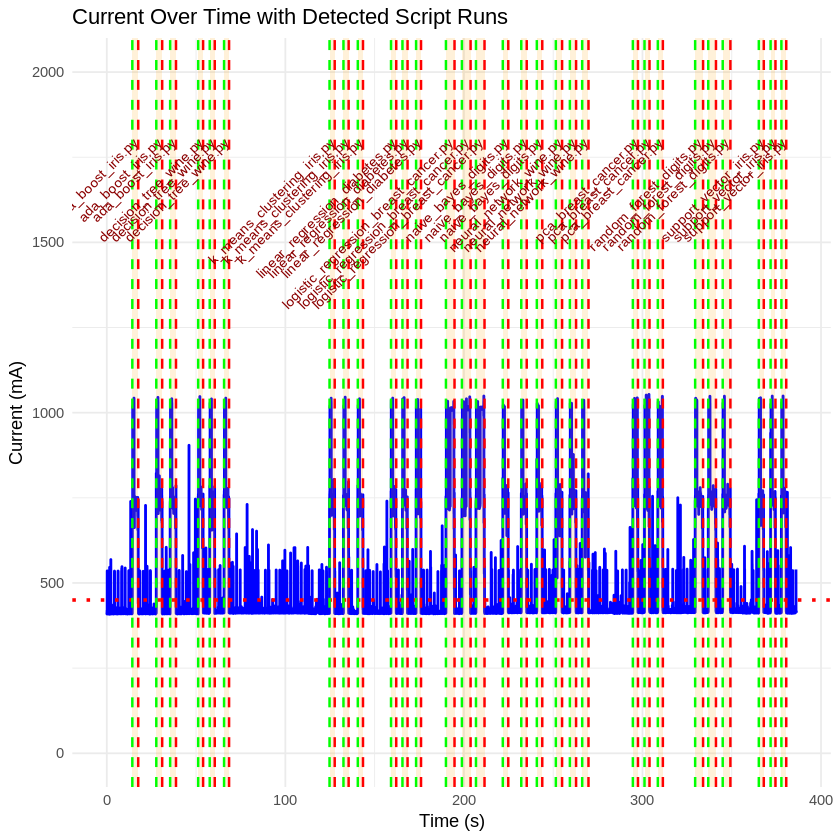

In [8]:
# Load necessary libraries
library(ggplot2)
library(tidyverse)

# Set the baseline threshold value
baseline_threshold <- 450

# Plot the current values over time from the power monitor data
current_plot <- ggplot(power_monitor_data, aes(x = `Time..s.`, y = `Main.Avg.Current..mA.`)) +
  geom_line(color = "blue", size = 0.8) +  # Plot current fluctuations
  geom_hline(yintercept = baseline_threshold, color = "red", linetype = "dotted", size = 1) +  # Add baseline threshold line
  labs(title = "Current Over Time with Detected Script Runs",
       x = "Time (s)",
       y = "Current (mA)") +
  theme_minimal() +
  ylim(1, 2000)  # Cap y-axis between 1 and 2000 mA

# Add highlighted areas representing detected script runs
for (i in 1:nrow(script_runs_detected_df)) {
  # Add shaded area for the script run
  current_plot <- current_plot +
    annotate("rect",
             xmin = script_runs_detected_df$start_time[i],
             xmax = script_runs_detected_df$end_time[i],
             ymin = -Inf,
             ymax = Inf,
             alpha = 0.15,  # Make shading slightly more visible
             fill = "orange")

  # Add script start and end lines with labels
  current_plot <- current_plot +
    geom_vline(xintercept = script_runs_detected_df$start_time[i], color = "green", linetype = "dashed", size = 0.7) +
    geom_vline(xintercept = script_runs_detected_df$end_time[i], color = "red", linetype = "dashed", size = 0.7) +
    annotate("text",
             x = (script_runs_detected_df$start_time[i] + script_runs_detected_df$end_time[i]) / 2,
             y = 1800,  # Place labels just below the upper limit of the y-axis (1800 mA)
             label = script_runs_detected_df$script_name[i],
             size = 3,
             color = "darkred",
             angle = 45,
             hjust = 1)
}

# Display the plot
print(current_plot)


In [ ]:
# Calculate the correlation coefficient between measured energy and CodeCarbon estimates
energy_correlation <- cor(comparison_data$measured_energy_kWh, comparison_data$codecarbon_energy_kWh, use = "complete.obs")

# Print the correlation coefficient
print(paste("Correlation coefficient between measured energy and CodeCarbon estimates:", energy_correlation))


[1] "Correlation coefficient between measured energy and CodeCarbon estimates: 0.957833008845995"


In [ ]:
colnames(comparison_data)

[1] "script_name"             "measured_energy_kWh"    
[3] "avg_duration_s"          "total_runs"             
[5] "codecarbon_energy_kWh"   "absolute_difference_kWh"
[7] "percentage_error"

In [9]:
# Focus on 'Log.Level'
log_level_analysis <- comparison_data %>%
  group_by(Log.Level) %>%
  summarise(
    mean_difference = mean(absolute_difference_kWh, na.rm = TRUE),
    sd_difference = sd(absolute_difference_kWh, na.rm = TRUE),
    median_difference = median(absolute_difference_kWh, na.rm = TRUE),
    count = n(),
    .groups = 'drop'
  )

# Print summary metrics for 'Log Level'
print("Summary metrics by Log Level:")
print(log_level_analysis)

# Visualization: Differences by Log Level
ggplot(log_level_analysis, aes(x = Log.Level, y = mean_difference, fill = Log.Level)) +
  geom_bar(stat = "identity") +
  geom_errorbar(aes(ymin = mean_difference - sd_difference, ymax = mean_difference + sd_difference), width = 0.4) +
  labs(title = "Impact of Log Level on Measurement Accuracy",
       x = "Log Level", y = "Mean Difference in kWh") +
  theme_minimal() +
  scale_fill_brewer(palette = "Pastel1")  # Using a color-blind friendly palette

# Execute the plot
print("Visualization of Measurement Differences by Log Level:")
print(ggplot(log_level_analysis, aes(x = Log.Level, y = mean_difference)) +
  geom_col(aes(fill = Log.Level)) +
  labs(title = "Average Measurement Differences by Log Level",
       x = "Log Level",
       y = "Average Difference (kWh)") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set2"))


ERROR: [1m[33mError[39m in `group_by()`:[22m
[1m[22m[33m![39m Must group by variables found in `.data`.
[31m✖[39m Column `Log.Level` is not found.


In [10]:
# Focus on 'Measure.Power.Secs'
measure_power_secs_analysis <- comparison_data %>%
  group_by(Measure.Power.Secs) %>%
  summarise(
    mean_difference = mean(absolute_difference_kWh, na.rm = TRUE),
    sd_difference = sd(absolute_difference_kWh, na.rm = TRUE),
    median_difference = median(absolute_difference_kWh, na.rm = TRUE),
    count = n(),
    .groups = 'drop'
  )

# Print summary metrics for 'Measure.Power.Secs'
print("Summary metrics by Measure Power Secs:")
print(measure_power_secs_analysis)

# Visualization: Differences by Measure Power Secs
ggplot(measure_power_secs_analysis, aes(x = as.factor(Measure.Power.Secs), y = mean_difference, fill = as.factor(Measure.Power.Secs))) +
  geom_bar(stat = "identity") +
  geom_errorbar(aes(ymin = mean_difference - sd_difference, ymax = mean_difference + sd_difference), width = 0.4) +
  labs(title = "Impact of Measure Power Seconds on Measurement Accuracy",
       x = "Measure Power Seconds", y = "Mean Difference in kWh") +
  theme_minimal() +
  scale_fill_brewer(palette = "Pastel1")  # Using a color-blind friendly palette

# Execute the plot
print("Visualization of Measurement Differences by Measure Power Seconds:")
print(ggplot(measure_power_secs_analysis, aes(x = as.factor(Measure.Power.Secs), y = mean_difference)) +
  geom_col(aes(fill = as.factor(Measure.Power.Secs))) +
  labs(title = "Average Measurement Differences by Measure Power Seconds",
       x = "Measure Power Seconds",
       y = "Average Difference (kWh)") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set2"))


ERROR: [1m[33mError[39m in `group_by()`:[22m
[1m[22m[33m![39m Must group by variables found in `.data`.
[31m✖[39m Column `Measure.Power.Secs` is not found.


In [11]:
# Focus on 'Tracking.Mode'
tracking_mode_analysis <- comparison_data %>%
  group_by(Tracking.Mode) %>%
  summarise(
    mean_difference = mean(absolute_difference_kWh, na.rm = TRUE),
    sd_difference = sd(absolute_difference_kWh, na.rm = TRUE),
    median_difference = median(absolute_difference_kWh, na.rm = TRUE),
    count = n(),
    .groups = 'drop'
  )

# Print summary metrics for 'Tracking.Mode'
print("Summary metrics by Tracking Mode:")
print(tracking_mode_analysis)

# Visualization: Differences by Tracking Mode
ggplot(tracking_mode_analysis, aes(x = Tracking.Mode, y = mean_difference, fill = Tracking.Mode)) +
  geom_bar(stat = "identity") +
  geom_errorbar(aes(ymin = mean_difference - sd_difference, ymax = mean_difference + sd_difference), width = 0.4) +
  labs(title = "Impact of Tracking Mode on Measurement Accuracy",
       x = "Tracking Mode", y = "Mean Difference in kWh") +
  theme_minimal() +
  scale_fill_brewer(palette = "Pastel2")  # Using a color-blind friendly palette

# Execute the plot
print("Visualization of Measurement Differences by Tracking Mode:")
print(ggplot(tracking_mode_analysis, aes(x = Tracking.Mode, y = mean_difference)) +
  geom_col(aes(fill = Tracking.Mode)) +
  labs(title = "Average Measurement Differences by Tracking Mode",
       x = "Tracking Mode",
       y = "Average Difference (kWh)") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3"))


ERROR: [1m[33mError[39m in `group_by()`:[22m
[1m[22m[33m![39m Must group by variables found in `.data`.
[31m✖[39m Column `Tracking.Mode` is not found.


In [12]:
# Assuming you have loaded your data into data frames named 'code_carbon_data' and 'script_runs_detected_df'
# and both data frames have a column 'script_name' or similar that identifies the script

library(dplyr)

# Aggregate estimated energy data by script name
estimated_aggregate <- code_carbon_data %>%
  group_by(Script) %>%
  summarize(Avg_Estimated_Energy = mean(Total.Energy.Consumed), .groups = 'drop')

# Aggregate measured energy data by script name
measured_aggregate <- script_runs_detected_df %>%
  group_by(script_name) %>%
  summarize(Avg_Measured_Energy = mean(Energy_kWh), .groups = 'drop')

# Join the two datasets on script name
combined_data <- inner_join(estimated_aggregate, measured_aggregate, by = c("Script" = "script_name"))


In [13]:
# Perform the Wilcoxon signed-rank test on aggregated data
test_result <- wilcox.test(combined_data$Avg_Estimated_Energy, combined_data$Avg_Measured_Energy, paired = TRUE)

# Print the test results
print(test_result)



	Wilcoxon signed rank exact test

data:  combined_data$Avg_Estimated_Energy and combined_data$Avg_Measured_Energy
V = 0, p-value = 0.001953
alternative hypothesis: true location shift is not equal to 0



In [14]:
library(dplyr)

# Assume you've already added or defined Sampling_Interval and Tracking_Mode
code_carbon_data <- code_carbon_data %>%
  mutate(
    Sampling_Interval = case_when(
      Measure.Power.Secs <= 5 ~ "5 sec",
      Measure.Power.Secs <= 15 ~ "15 sec",
      TRUE ~ "30 sec"
    ),
    Tracking_Mode = if_else(Measurement.Type == "specific_type", "machine", "process")
  )

# Join dataframes on script identifiers
combined_data <- inner_join(code_carbon_data, script_runs_detected_df, by = c("Script" = "script_name"))

# Group by Sampling_Interval, Logging_Level (renaming Log.Level), and Tracking_Mode
grouped_data <- combined_data %>%
  group_by(Sampling_Interval, Logging_Level = Log.Level, Tracking_Mode) %>%
  summarise(
    Avg_Estimated_Energy = mean(Total.Energy.Consumed, na.rm = TRUE),
    Avg_Measured_Energy = mean(Energy_kWh, na.rm = TRUE),
    .groups = 'drop'
  )

# Wilcoxon signed-rank test for each subgroup
results <- grouped_data %>%
  summarise(Test_Result = list(wilcox.test(Avg_Estimated_Energy, Avg_Measured_Energy, paired = TRUE)))

# View results
print(results)


Warning message in inner_join(code_carbon_data, script_runs_detected_df, by = c(Script = "script_name")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


# A tibble: 1 × 1
  Test_Result
  <list>     
1 <htest>    


In [ ]:
colnames(script_runs_detected_df)

[1] "start_time"  "start_index" "script_name" "end_time"    "duration"   
[6] "Energy_kWh"

In [15]:
library(dplyr)

# Aggregate to get the average measured energy by script_name
avg_measured_energy <- script_runs_detected_df %>%
  group_by(script_name) %>%
  summarise(Avg_Measured_Energy = mean(Energy_kWh, na.rm = TRUE)) %>%
  ungroup()  # Ensure that the resulting dataframe is no longer grouped


In [16]:
# Join the aggregated measured energy data with code_carbon_data
enhanced_code_carbon_data <- code_carbon_data %>%
  left_join(avg_measured_energy, by = c("Script" = "script_name"))


In [17]:
# Performing the Wilcoxon signed-rank test on the joined dataset
# Make sure to handle NA values which may exist if some scripts don't have measured data
results <- wilcox.test(
  enhanced_code_carbon_data$Total.Energy.Consumed,
  enhanced_code_carbon_data$Avg_Measured_Energy,
  paired = TRUE,
)

# Print results
print(results)



	Wilcoxon signed rank test with continuity correction

data:  enhanced_code_carbon_data$Total.Energy.Consumed and enhanced_code_carbon_data$Avg_Measured_Energy
V = 0, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



In [31]:
# prompt: generate me a code that tells me the unique values of the column tracking mode of the code_carbon_data

unique(code_carbon_data$Tracking.Mode)

[1] "machine" "process"

In [32]:
# Aggregate script_runs_detected_df by script_name
avg_measured_energy <- script_runs_detected_df %>%
  group_by(script_name) %>%
  summarise(Avg_Measured_Energy = mean(Energy_kWh)) %>%
  ungroup()

# Join this data to code_carbon_data
enhanced_code_carbon_data <- code_carbon_data %>%
  left_join(avg_measured_energy, by = c("Script" = "script_name"))


In [33]:
unique(enhanced_code_carbon_data$Tracking.Mode)

[1] "machine" "process"

In [19]:
head(enhanced_code_carbon_data)

,CPU.Energy,CPU.Model,Device.ID,Duration..s.,Energy..kWh.,GPU.Energy,GPU.Model,Log.Level,Measure.Power.Secs,Measurement.Type,⋯,RAM,RAM.Energy,Run.ID,Run.Number,Script,Total.Energy.Consumed,Tracking.Mode,Sampling_Interval,Tracking_Mode,Avg_Measured_Energy
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<lgl>,<chr>,<int>,<chr>,⋯,<dbl>,<dbl>,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,3.877856e-05,ARMv8 Processor rev 1 (v8l),Jetson Nano,3.285547,4.010215e-05,0,NA,debug,5,CC,⋯,3.870979,1.323588e-06,824b99bb3ff366a65ecbbc673f30192ed4fbac8b5c14fc7175b2024b7145a833,1,ada_boost_iris.py,4.010215e-05,machine,5 sec,process,0.001591485
2,3.238749e-05,ARMv8 Processor rev 1 (v8l),Jetson Nano,2.744173,3.349283e-05,0,NA,debug,5,CC,⋯,3.870979,1.105339e-06,9faa48419be31211fe106087c2ab0de17dccd62952b44339142c18298bea792c,1,decision_tree_wine.py,3.349283e-05,machine,5 sec,process,0.001366398
3,3.370906e-05,ARMv8 Processor rev 1 (v8l),Jetson Nano,2.856141,3.485952e-05,0,NA,debug,5,CC,⋯,3.870979,1.150457e-06,60f940a8f340396f7e29fabd70f3d6ce64c7c39cbc8fb0526fa71e6d3e5b7837,1,k_means_clustering_iris.py,3.485952e-05,machine,5 sec,process,0.001407937
4,3.206449e-05,ARMv8 Processor rev 1 (v8l),Jetson Nano,2.716815,3.315882e-05,0,NA,debug,5,CC,⋯,3.870979,1.094323e-06,805b314be16865b9ba35483fceef3e09e688d37e7cff8fd229e9b20952e1a568,1,linear_regression_diabetes.py,3.315882e-05,machine,5 sec,process,0.001364540
5,5.536904e-05,ARMv8 Processor rev 1 (v8l),Jetson Nano,4.690858,5.725934e-05,0,NA,debug,5,CC,⋯,3.870979,1.890302e-06,a19adaa6b0a52e01c228b660c3cdf8bd4b7bece0cb00f693d5a0b1b6d04aee80,1,logistic_regression_breast_cancer.py,5.725934e-05,machine,5 sec,process,0.003056595
6,3.546020e-05,ARMv8 Processor rev 1 (v8l),Jetson Nano,3.004453,3.667039e-05,0,NA,debug,5,CC,⋯,3.870979,1.210190e-06,34da61d5998774ed9ed2a5dc0bff8dad69c2c5a8a6d4b28618048608e8d351f9,1,naive_bayes_digits.py,3.667039e-05,machine,5 sec,process,0.001488735


In [ ]:
# Group by configuration parameters and perform the Wilcoxon signed-rank test
results <- enhanced_code_carbon_data %>%
  group_by(Sampling_Interval, Log.Level, Tracking_Mode) %>%
  summarise(
    Test_Statistic = list(wilcox.test(Total.Energy.Consumed, Avg_Measured_Energy, paired = TRUE)),
    .groups = 'drop'
  )

# Print the test results
print(results)


# A tibble: 15 × 4
   Sampling_Interval Log.Level Tracking_Mode Test_Statistic
   <chr>             <chr>     <chr>         <list>        
 1 15 sec            critical  process       <htest>       
 2 15 sec            debug     process       <htest>       
 3 15 sec            error     process       <htest>       
 4 15 sec            info      process       <htest>       
 5 15 sec            warning   process       <htest>       
 6 30 sec            critical  process       <htest>       
 7 30 sec            debug     process       <htest>       
 8 30 sec            error     process       <htest>       
 9 30 sec            info      process       <htest>       
10 30 sec            warning   process       <htest>       
11 5 sec             critical  process       <htest>       
12 5 sec             debug     process       <htest>       
13 5 sec             error     process       <htest>       
14 5 sec             info      process       <htest>       
15 5 sec             

In [20]:
library(dplyr)

results <- enhanced_code_carbon_data %>%
  group_by(Sampling_Interval, Log.Level, Tracking_Mode) %>%
  summarise(
    Test_Statistic = list(wilcox.test(Total.Energy.Consumed, Avg_Measured_Energy, paired = TRUE, na.action = na.exclude)),
    P_Value = sapply(list(wilcox.test(Total.Energy.Consumed, Avg_Measured_Energy, paired = TRUE, na.action = na.exclude)), function(x) x$p.value),
    .groups = 'drop'
  )

# Print the results with p-values
print(results)


# A tibble: 15 × 5
   Sampling_Interval Log.Level Tracking_Mode Test_Statistic  P_Value
   <chr>             <chr>     <chr>         <list>            <dbl>
 1 15 sec            critical  process       <htest>        1.67e-11
 2 15 sec            debug     process       <htest>        1.67e-11
 3 15 sec            error     process       <htest>        1.67e-11
 4 15 sec            info      process       <htest>        1.67e-11
 5 15 sec            warning   process       <htest>        1.67e-11
 6 30 sec            critical  process       <htest>        1.67e-11
 7 30 sec            debug     process       <htest>        1.67e-11
 8 30 sec            error     process       <htest>        1.67e-11
 9 30 sec            info      process       <htest>        1.67e-11
10 30 sec            warning   process       <htest>        1.67e-11
11 5 sec             critical  process       <htest>        1.67e-11
12 5 sec             debug     process       <htest>        1.67e-11
13 5 sec       

In [22]:
# Install the lme4 package if not already installed
if (!requireNamespace("lme4", quietly = TRUE)) {
    install.packages("lme4")
}

# Load necessary libraries
library(dplyr)
library(lme4) # for linear mixed models

# Assuming 'enhanced_code_carbon_data' is your dataframe
# Calculating the difference between estimated and measured energy
enhanced_code_carbon_data <- enhanced_code_carbon_data %>%
  mutate(Energy_Difference = Total.Energy.Consumed - Avg_Measured_Energy)

# Fitting a linear mixed model
model <- lmer(Energy_Difference ~ Sampling_Interval * Log.Level * Tracking_Mode + (1 | Device.ID), data = enhanced_code_carbon_data)

# Displaying the summary of the model
summary(model)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘RcppEigen’


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




ERROR: Error: grouping factors must have > 1 sampled level


In [23]:
colnames(enhanced_code_carbon_data)

[1] "CPU.Energy"            "CPU.Model"             "Device.ID"            
 [4] "Duration..s."          "Energy..kWh."          "GPU.Energy"           
 [7] "GPU.Model"             "Log.Level"             "Measure.Power.Secs"   
[10] "Measurement.Type"      "OS"                    "RAM"                  
[13] "RAM.Energy"            "Run.ID"                "Run.Number"           
[16] "Script"                "Total.Energy.Consumed" "Tracking.Mode"        
[19] "Sampling_Interval"     "Tracking_Mode"         "Avg_Measured_Energy"  
[22] "Energy_Difference"

In [24]:
library(dplyr)
library(ggplot2)

# Assuming 'enhanced_code_carbon_data' is your dataframe
# Adding a column for energy difference
enhanced_code_carbon_data <- enhanced_code_carbon_data %>%
  mutate(Energy_Difference = Total.Energy.Consumed - Avg_Measured_Energy)

# Analyzing the impact of Sampling Interval on Energy Difference
results <- list()
categories <- unique(enhanced_code_carbon_data$Sampling_Interval)

for (category in categories) {
  data_subset <- enhanced_code_carbon_data %>%
    filter(Sampling_Interval == category)

  # Assuming non-normal distribution; using Spearman's rank correlation
  correlation_test <- cor.test(data_subset$Energy_Difference, data_subset$Total.Energy.Consumed,
                               method = "spearman")

  results[[category]] <- list(
    Correlation_Coefficient = correlation_test$estimate,
    P_Value = correlation_test$p.value
  )
}

# Print results
print(results)


$`5 sec`
$`5 sec`$Correlation_Coefficient
       rho 
-0.9512968 

$`5 sec`$P_Value
[1] 0


$`15 sec`
$`15 sec`$Correlation_Coefficient
       rho 
-0.9442518 

$`15 sec`$P_Value
[1] 0


$`30 sec`
$`30 sec`$Correlation_Coefficient
       rho 
-0.9463038 

$`30 sec`$P_Value
[1] 0




In [26]:
library(dplyr)

# Assuming 'enhanced_code_carbon_data' has your data
# Calculate the energy differences
enhanced_code_carbon_data <- enhanced_code_carbon_data %>%
  mutate(Energy_Difference = Total.Energy.Consumed - Avg_Measured_Energy)

# Perform Kruskal-Wallis test
kruskal_test <- kruskal.test(Energy_Difference ~ Sampling_Interval, data = enhanced_code_carbon_data)

# Print the results
print(kruskal_test)



	Kruskal-Wallis rank sum test

data:  Energy_Difference by Sampling_Interval
Kruskal-Wallis chi-squared = 0.036061, df = 2, p-value = 0.9821



In [47]:
# Assuming the 'enhanced_code_carbon_data' dataframe is already loaded and structured properly

# Make sure the Energy_Difference is calculated
enhanced_code_carbon_data <- enhanced_code_carbon_data %>%
  mutate(Energy_Difference = Total.Energy.Consumed - Avg_Measured_Energy)

# Perform Kruskal-Wallis test on Energy_Difference across different Log.Levels
kruskal_test_log_level <- kruskal.test(Energy_Difference ~ Log.Level, data = enhanced_code_carbon_data)

# Print the results
print(kruskal_test_log_level)



	Kruskal-Wallis rank sum test

data:  Energy_Difference by Log.Level
Kruskal-Wallis chi-squared = 0.030741, df = 4, p-value = 0.9999



In [51]:
# prompt: give me acode that tells me the count values of the column Tracking.Mode of the enhanced code carbon dat

table(enhanced_code_carbon_data$Tracking_Mode)


process 
    900 

In [48]:
colnames(enhanced_code_carbon_data)

[1] "CPU.Energy"            "CPU.Model"             "Device.ID"            
 [4] "Duration..s."          "Energy..kWh."          "GPU.Energy"           
 [7] "GPU.Model"             "Log.Level"             "Measure.Power.Secs"   
[10] "Measurement.Type"      "OS"                    "RAM"                  
[13] "RAM.Energy"            "Run.ID"                "Run.Number"           
[16] "Script"                "Total.Energy.Consumed" "Tracking.Mode"        
[19] "Sampling_Interval"     "Tracking_Mode"         "Avg_Measured_Energy"  
[22] "Energy_Difference"

In [53]:
# Assuming the 'enhanced_code_carbon_data' dataframe is already loaded and structured properly

# Make sure the Energy_Difference is calculated
enhanced_code_carbon_data <- enhanced_code_carbon_data %>%
  mutate(Energy_Difference = Total.Energy.Consumed - Avg_Measured_Energy)

# Perform Kruskal-Wallis test on Energy_Difference across different Tracking Modes
kruskal_test_tracking_mode <- kruskal.test(Energy_Difference ~ Tracking_Mode, data = enhanced_code_carbon_data)

# Print the results
print(kruskal_test_tracking_mode)


# prompt: write me a script that shows me what is the average value of the energy measurement in the code carbon data when grouped by tracking mode

library(dplyr)

# Assuming 'enhanced_code_carbon_data' is your dataframe
# Calculate the average energy consumption for each tracking mode
average_energy_by_tracking_mode <- enhanced_code_carbon_data %>%
  group_by(Tracking.Mode) %>%
  summarize(Average_Energy = mean(Energy_Difference))

# Print the results
average_energy_by_tracking_mode

ERROR: Error in kruskal.test.default(x = mf[[1L]], g = mf[[2L]]): all observations are in the same group


In [41]:
# prompt: write me a script that shows me what is the average value of the energy measurement in the code carbon data when grouped by tracking mode

library(dplyr)

# Assuming 'enhanced_code_carbon_data' is your dataframe
# Calculate the average energy consumption for each tracking mode
average_energy_by_tracking_mode <- enhanced_code_carbon_data %>%
  group_by(Tracking.Mode) %>%
  summarize(Average_Energy = mean(Total.Energy.Consumed, na.rm = TRUE))

# Print the results
average_energy_by_tracking_mode

Tracking.Mode,Average_Energy
<chr>,<dbl>
machine,3.974457e-05
process,3.898171e-05


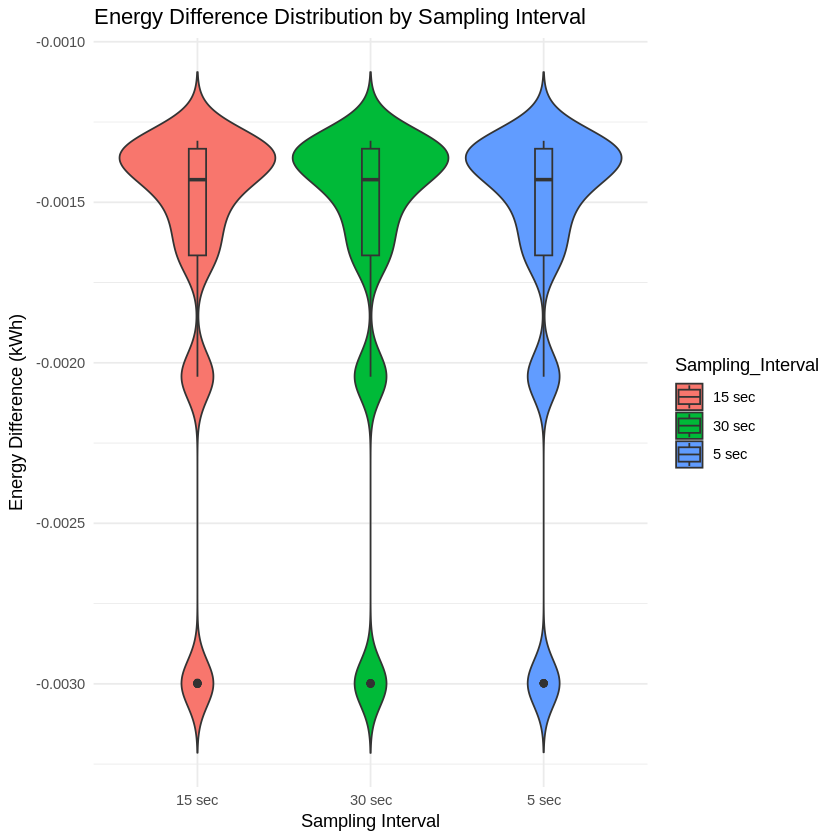

In [25]:
ggplot(enhanced_code_carbon_data, aes(x = Sampling_Interval, y = Energy_Difference, fill = Sampling_Interval)) +
  geom_violin(trim = FALSE) +
  geom_boxplot(width = 0.1, position = position_dodge(width = 0.9), alpha = 0.7) +
  theme_minimal() +
  labs(title = "Energy Difference Distribution by Sampling Interval",
       x = "Sampling Interval",
       y = "Energy Difference (kWh)")


In [ ]:
# prompt: can you genrate a code that gives me the count of unique values of the column Tracking_Mode of the dataframe code_carbon_data

# Assuming 'comparison_data' is your dataframe
library(dplyr)

code_carbon_data %>%
  count(Tracking.Mode)

Tracking.Mode,n
<chr>,<int>
machine,450
process,450


[1] "Pearson Correlation:  0.996845680617523"
[1] "Spearman Correlation:  0.951816516645905"


`geom_smooth()` using formula = 'y ~ x'


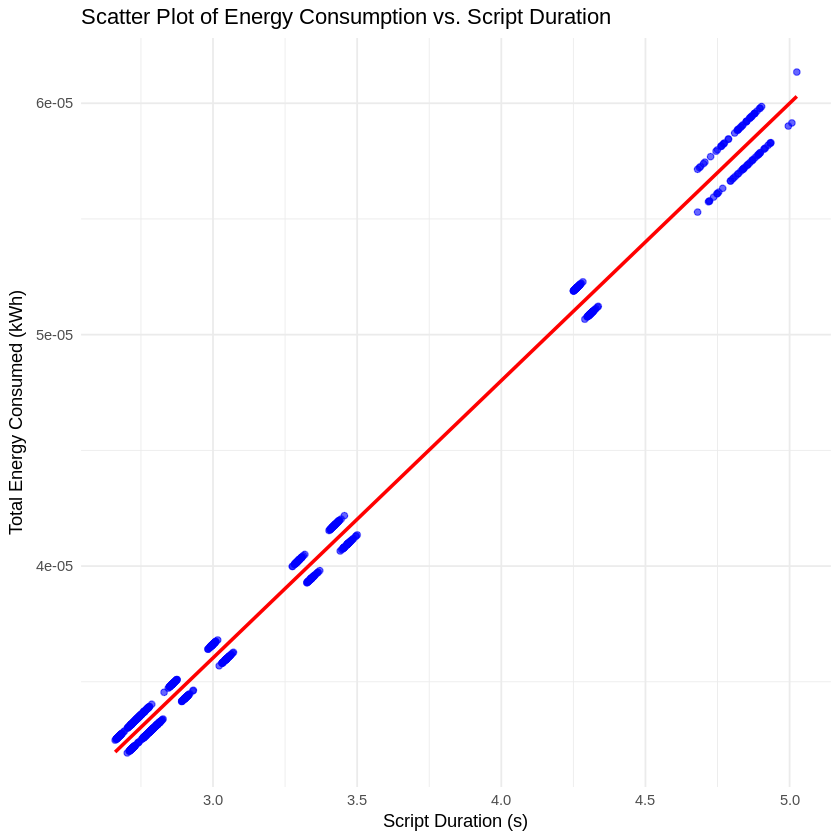

In [ ]:
# Load necessary libraries
library(ggplot2)

# Calculate Pearson correlation
pearson_corr <- cor(code_carbon_data$Total.Energy.Consumed, code_carbon_data$Duration..s., use = "complete.obs", method = "pearson")
print(paste("Pearson Correlation: ", pearson_corr))

# Calculate Spearman correlation (if data is non-normal or if you want to check rank correlation)
spearman_corr <- cor(code_carbon_data$Total.Energy.Consumed, code_carbon_data$Duration..s., use = "complete.obs", method = "spearman")
print(paste("Spearman Correlation: ", spearman_corr))

# Create a scatter plot of energy consumption vs. script duration
ggplot(code_carbon_data, aes(x = Duration..s., y = Total.Energy.Consumed)) +
  geom_point(color = "blue", alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE, color = "red") + # Adds a linear regression line
  labs(title = "Scatter Plot of Energy Consumption vs. Script Duration",
       x = "Script Duration (s)",
       y = "Total Energy Consumed (kWh)") +
  theme_minimal()


In [ ]:
colnames(code_carbon_data)

[1] "CPU.Energy"            "CPU.Model"             "Device.ID"            
 [4] "Duration..s."          "Energy..kWh."          "GPU.Energy"           
 [7] "GPU.Model"             "Log.Level"             "Measure.Power.Secs"   
[10] "Measurement.Type"      "OS"                    "RAM"                  
[13] "RAM.Energy"            "Run.ID"                "Run.Number"           
[16] "Script"                "Total.Energy.Consumed" "Tracking.Mode"        
[19] "Sampling_Interval"     "Tracking_Mode"